# Job Requirement and Salary for Different Analysts Positions

## Objectives & Introduction

- Predict and visualize data-related jobs’ salaries based on our skills and our program’s syllabus.
- Compare and analyze the distribution and features of the salaries and skills that data-related jobs present in the dataset and our prediction.


- Data sources: https://www.kaggle.com/code/josephgutstadt/skills-for-a-data-scientist-analyst/data?select=all_jobs.csv

- Variables: include title, job discription, company name, location, industry, etc.

- Content:

Compare the salaries and languages that different position analysts have and use. Thus, it can also provide visualization about my future after I graduate from the master of analytics program.

> Part 1

Use iteration and conditional statements to find out the programming languages each position requires, and use NumPy to find the statistics of the salaries for the positions.


> Part 2

Statistical testings on the variables, identifying the relationships.

> Part 3

Visualizing the salaries among different positions and also how programming language requirements vary. Also, plot based on other variables, like industry, location, the size of companies, etc.

# Part 1 - Data Processing



## Part 1.1 - Loading Data

In [ ]:
import numpy as np 
import pandas as pd 
import re
from numpy import NaN
import warnings
from pandas.core.common import SettingWithCopyWarning

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


In [1]:

import pandas as pd
jobs = pd.read_csv('/Users/soniaasunn/Desktop/berkeley/bootcamp/final/all_jobs.csv')

In [2]:
jobs.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True


## Part 1.2 -  Preprocess Data

The data in 'Job Description' contains a lot a characters that will not make sense to our model. Let's refine the data by only keeping words in the job description.

In [ ]:
jobs['Job Description'] = jobs['Job Description'].str.lower() #makes all words in lowercase

jobs['Job Description'] = jobs['Job Description'].apply(lambda desc: re.sub('[^a-zA-Z\']',' ', desc)) 

## Part 1.3 - Grouping Skills to Categories

In [ ]:
skill_types = {}

#categories & keywords
skill_types['Programming Languages'] = ['python', 'r', 'c++', 'c', 'c#', 'java', 'javascript', 'ruby', 'julia', 'sql', 'matlab','scala']

skill_types['Statistics'] = ['matlab', 'statistical', 'models', 'modeling', 'statistics', 'analytics','forecasting',
                             'predictive', 'r', 'pandas', 'sas','saseg', 'Julia', 'hypothesis', 'a/b testing']

skill_types['Machine Learning'] = ['datarobot','tensorflow','knime','rapidminer','mahout','logicalglue','nltk',
                                   'networkx','rapidminer','scikit','pytorch','keras','caffe','weka','orange',
                                   'qubole','ai','nlp', 'ml','neuralnetworks','deeplearning', 'machine learning', 
                                   'pca', 'clustering', 'kmeans']

skill_types['Data Visualization'] = ['visualization','tableau','powerpoint','Qlik','looker','powerbi','matplotlib','tibco','bokeh',
                                     'd3', 'octave','shiny','microstrategy','excel']

skill_types['Database'] = ['sql','oracle','mysql','oraclenosql','nosql','postgresql','plsql','mongodb']



for k,v in skill_types.items():
    skill_types[k] = [skill.lower() for skill in skill_types.get(k)]

print(skill_types)

{'Programming Languages': ['python', 'r', 'c++', 'c', 'c#', 'java', 'javascript', 'ruby', 'julia', 'sql', 'matlab', 'scala'], 'Statistics': ['matlab', 'statistical', 'models', 'modeling', 'statistics', 'analytics', 'forecasting', 'predictive', 'r', 'pandas', 'sas', 'saseg', 'julia', 'hypothesis', 'a/b testing'], 'Machine Learning': ['datarobot', 'tensorflow', 'knime', 'rapidminer', 'mahout', 'logicalglue', 'nltk', 'networkx', 'rapidminer', 'scikit', 'pytorch', 'keras', 'caffe', 'weka', 'orange', 'qubole', 'ai', 'nlp', 'ml', 'neuralnetworks', 'deeplearning', 'machine learning', 'pca', 'clustering', 'kmeans'], 'Data Visualization': ['visualization', 'tableau', 'powerpoint', 'qlik', 'looker', 'powerbi', 'matplotlib', 'tibco', 'bokeh', 'd3', 'octave', 'shiny', 'microstrategy', 'excel'], 'Database': ['sql', 'oracle', 'mysql', 'oraclenosql', 'nosql', 'postgresql', 'plsql', 'mongodb']}


## Part 1.4 - Grouping Programming Languages


In [ ]:
programming_languages = {}

#categories & keywords
programming_languages['Python'] = ['python', 'sklearn', 'scikit learn', 'numpy', 'pandas', 'matplolib', 'scipy', 'scikit-learn', 'statsmodels', 'seaborn']

programming_languages['R'] = ['r', 'ggplot2', 'data.table', 'dplyr', 'tidyr', 'shiny', 'plotly', 'knitr', 'mlr3', 'xgboost', 'caret']

programming_languages['SQL'] = ['sql','oracle','mysql','oraclenosql','nosql','postgresql','plsql','mongodb']

programming_languages['Java'] = ['java', 'deeplearning4j','dl4j', 'nd4j', 'jsat','java-ml','mllib','ranklib','retina','jdmp','encog'] # some data-related libraries in java

programming_languages['Julia'] = ['julia', 'gadfly.jl', 'makie.jl', 'google charts', 'plots.jl', 'pyplot.jl', 'pgfplotsx.jl', 'unicodeplots.jl', 'vegalite.jl']

programming_languages['scala'] = ['scala', 'mllib', 'deeplearning4j', 'dl4j', 'bigdl', 'h2o sparkling water', 'conjecture', 'akka','spray','slick']

programming_languages['Matlab'] = ['matlab']



for k,v in programming_languages.items():
    programming_languages[k] = [language.lower() for language in programming_languages.get(k)]

print(programming_languages)

{'Python': ['python', 'sklearn', 'scikit learn', 'numpy', 'pandas', 'matplolib', 'scipy', 'scikit-learn', 'statsmodels', 'seaborn'], 'R': ['r', 'ggplot2', 'data.table', 'dplyr', 'tidyr', 'shiny', 'plotly', 'knitr', 'mlr3', 'xgboost', 'caret'], 'SQL': ['sql', 'oracle', 'mysql', 'oraclenosql', 'nosql', 'postgresql', 'plsql', 'mongodb'], 'Java': ['java', 'deeplearning4j', 'dl4j', 'nd4j', 'jsat', 'java-ml', 'mllib', 'ranklib', 'retina', 'jdmp', 'encog'], 'Julia': ['julia', 'gadfly.jl', 'makie.jl', 'google charts', 'plots.jl', 'pyplot.jl', 'pgfplotsx.jl', 'unicodeplots.jl', 'vegalite.jl'], 'scala': ['scala', 'mllib', 'deeplearning4j', 'dl4j', 'bigdl', 'h2o sparkling water', 'conjecture', 'akka', 'spray', 'slick'], 'Matlab': ['matlab']}


## Part 1.5 - Refining Job Descriptions

Now that with skill types, we can find these skills in the job descriptions and add them to a new column, 'refined skills'

First, I write a function to check whether individual words from the job description match any keywords in the categories. If they do, then add the categories to the new skills list.

In [ ]:
def refiner(desc):
    desc = desc.split()
    
    two_word = ''
    newskills = []
    
    for word in desc:
        two_word = two_word + word 
        for key,value in skill_types.items():
            if((word in value) or (two_word in value)):
                newskills.append(key)       
        two_word = word
                
    return list(set(newskills))

def refiner_2(desc):
    desc = desc.split()
    
    two_word = ''
    newlanguages = []
    
    for word in desc:
        two_word = two_word + word 
        for key,value in programming_languages.items():
            if((word in value) or (two_word in value)):
                newlanguages.append(key)       
        two_word = word
                
    return list(set(newlanguages))

Next, substitute these skills in the new column

In [ ]:
jobs['refined skills'] = jobs['Job Description'].apply(refiner)

jobs['refined skills']

0                                                       []
1                         [Statistics, Data Visualization]
2            [Programming Languages, Statistics, Database]
3                                                       []
4                         [Statistics, Data Visualization]
                               ...                        
26975             [Machine Learning, Database, Statistics]
26976                                         [Statistics]
26977    [Programming Languages, Statistics, Database, ...
26978    [Programming Languages, Statistics, Database, ...
26979                                                   []
Name: refined skills, Length: 26980, dtype: object

Next, substitute programming languages in the new column

In [ ]:
jobs['programming languages'] = jobs['Job Description'].apply(refiner_2)

jobs['programming languages']

0                   []
1                   []
2                [SQL]
3                   []
4                   []
             ...      
26975            [SQL]
26976               []
26977    [SQL, Python]
26978    [SQL, Python]
26979               []
Name: programming languages, Length: 26980, dtype: object

## Part 1.6 - Refining Salary Estimates

The given data in salary estimates contain a lot of noise, which need to be cleaned.

The salary estimates column has data in the form of strings such as:


In [ ]:
jobs['Salary Estimate']

0        $56K-$102K (Glassdoor est.)
1        $56K-$102K (Glassdoor est.)
2        $56K-$102K (Glassdoor est.)
3        $56K-$102K (Glassdoor est.)
4        $56K-$102K (Glassdoor est.)
                    ...             
26975    $55K-$112K (Glassdoor est.)
26976    $55K-$112K (Glassdoor est.)
26977    $55K-$112K (Glassdoor est.)
26978    $55K-$112K (Glassdoor est.)
26979    $55K-$112K (Glassdoor est.)
Name: Salary Estimate, Length: 26980, dtype: object

To take out the actual values, run the following code:

In [ ]:
#Firstly remove all rows without salary estimates  ~47 rows out of 26980
jobs = jobs[jobs['Salary Estimate'] != '-1']

#Now store the upper, lower, and average estimates of salaries into 3 new columns

pattern = re.compile('[^0-9]')    #pattern for scrubbing out text and keeping only the numbers

jobs['Salary Lower Limit'] = jobs['Salary Estimate'].apply(lambda x: int(pattern.sub(' ', x).split()[0]))
jobs['Salary Upper Limit'] = jobs['Salary Estimate'].apply(lambda x: int(pattern.sub(' ', x).split()[1]))
jobs['Salary Average'] = jobs[['Salary Lower Limit','Salary Upper Limit']].mean(axis=1)


## Part 1.7 - Refining Job Titles

The given job titles contain a lot of ambiguity

Replace these job titles with one of three titles: Data Analyst, Business Analyst, and Product Analyst.

In [ ]:
job_categories = {}

#categories & keywords
job_categories['Data Analyst'] = ['data analyst','data']
job_categories['Business Analyst'] = ['business analyst','business']
job_categories['Product Analyst'] = ['product analyst','product']

def jobrefiner(title):
    title = title.lower()
    title_words = title.split()
    two_word = ''
    newjobtitles = []
    
    for word in title_words:
        two_word = two_word + word 
        for key,value in job_categories.items():
            if((word in value) or (two_word in value)):
                newjobtitles.append(key)
                
        #check for the two worders, like 'businessintelligence'        
        two_word = word

    if newjobtitles == [] or len(newjobtitles)!=1:   
      return NaN
    return list(set(newjobtitles))


jobs['Refined Job Titles'] = jobs['Job Title'].apply(jobrefiner)
analyst_jobs = jobs[~jobs['Refined Job Titles'].isna()]           #remove rows that are not analyst roles
analyst_jobs['Refined Job Titles'] = analyst_jobs['Refined Job Titles'].apply(lambda x: str(x[0]))

Now we have refined job titles for the analyst jobs:

In [ ]:
analyst_jobs['Refined Job Titles']

0        Business Analyst
1        Business Analyst
2            Data Analyst
5            Data Analyst
7        Business Analyst
               ...       
26974        Data Analyst
26975        Data Analyst
26976        Data Analyst
26977        Data Analyst
26978        Data Analyst
Name: Refined Job Titles, Length: 16550, dtype: object

In [ ]:
analyst_jobs['Refined Job Titles'].value_counts()

Data Analyst        9348
Business Analyst    6991
Product Analyst      211
Name: Refined Job Titles, dtype: int64

# Part 2 - Statistical Testing

## Part 2.1 - Relationship between Refined Job Titles & Salary: Chi-Square

In [ ]:
# Chi-square Test b/t 'Refined Job Titles' & 'Salary Estimate'
from scipy.stats import chi2_contingency 
chisqt = pd.crosstab(analyst_jobs['Refined Job Titles'], analyst_jobs['Salary Estimate'])

chi2_stat, p, dof, expected = chi2_contingency(chisqt)
print('The Chi-square Test Result: ')
print(f"  chi2 statistic:     {chi2_stat}")
print(f"  p-value:            {p}")
print(f"  degrees of freedom: {dof}")


The Chi-square Test Result: 
  chi2 statistic:     13120.98789589059
  p-value:            0.0
  degrees of freedom: 1588


Therefore, from the above result, since the p-value = 0.0, we can **reject the null hypothesis**, concluding that **Job Titles are not independent of Salary**.

## Part 2.2 - Relationship between Location & Salary: Chi-Square


In [ ]:
# Chi-square Test b/t 'Location' & 'Salary Estimate'
chisqt = pd.crosstab(analyst_jobs['Location'], analyst_jobs['Salary Estimate'])

chi2_stat, p, dof, expected = chi2_contingency(chisqt)
print('The Chi-square Test Result: ')
print(f"  chi2 statistic:     {chi2_stat}")
print(f"  p-value:            {p}")
print(f"  degrees of freedom: {dof}")


The Chi-square Test Result: 
  chi2 statistic:     1571155.864437382
  p-value:            0.0
  degrees of freedom: 630436


Therefore, from the above result, since the p-value = 0.0, we can **reject the null hypothesis**, concluding that **Location are not independent of Salary**.

## Part 2.3 - Relationship between Type of Ownership & Salary: Chi-Square

In [ ]:
# Chi-square Test b/t 'Type of ownership' & 'Salary Estimate'
chisqt = pd.crosstab(analyst_jobs['Type of ownership'], analyst_jobs['Salary Estimate'])

chi2_stat, p, dof, expected = chi2_contingency(chisqt)
print('The Chi-square Test Result: ')
print(f"  chi2 statistic:     {chi2_stat}")
print(f"  p-value:            {p}")
print(f"  degrees of freedom: {dof}")

The Chi-square Test Result: 
  chi2 statistic:     17134.925882664586
  p-value:            3.4417213985705585e-265
  degrees of freedom: 11116


Therefore, from the above result, since the p-value < 0.00001, we can **reject the null hypothesis**, concluding that **Type of Ownership are not independent of Salary**.

# Part 3 - Visualization


## Part 3.1 - Visualizing Estimate Salaries

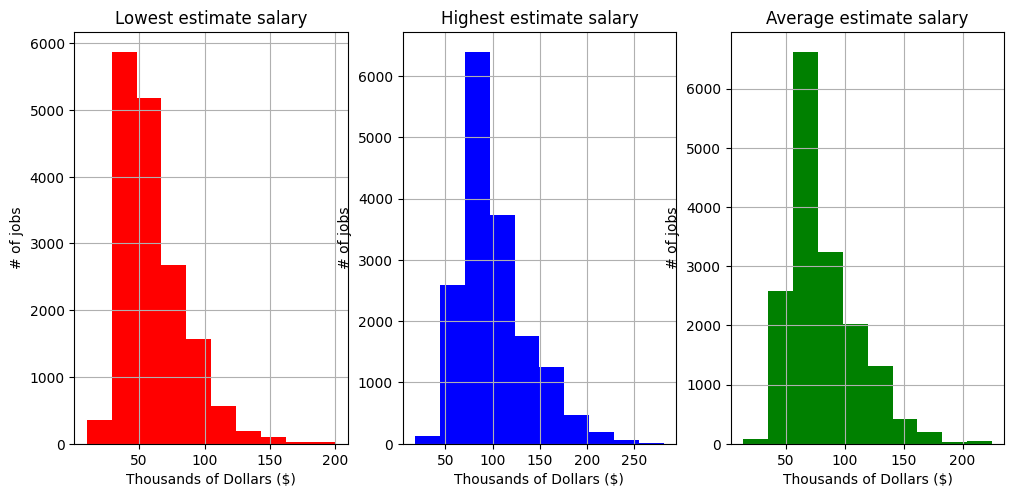

In [ ]:
# First, we take a look on the overall estimated salaries for all analysts with histograms.
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize=(12,12),dpi = 100)
plt.subplot(2,3,1)
plt.hist(analyst_jobs['Salary Lower Limit'],color = 'red')
plt.xlabel('Thousands of Dollars ($)')
plt.ylabel('# of jobs')
plt.grid(True)
plt.title('Lowest estimate salary')   
     
plt.subplot(2,3,2)
plt.hist(analyst_jobs['Salary Upper Limit'],color = 'blue')
plt.xlabel('Thousands of Dollars ($)')
plt.ylabel('# of jobs')
plt.grid(True)
plt.title('Highest estimate salary')   

plt.subplot(2,3,3)
plt.hist(analyst_jobs['Salary Average'],color = 'green')
plt.xlabel('Thousands of Dollars ($)')
plt.ylabel('# of jobs')
plt.grid(True)
plt.title('Average estimate salary')  
     
plt.show()

#Then, now lets see how the skills requirements look like for all the jobs

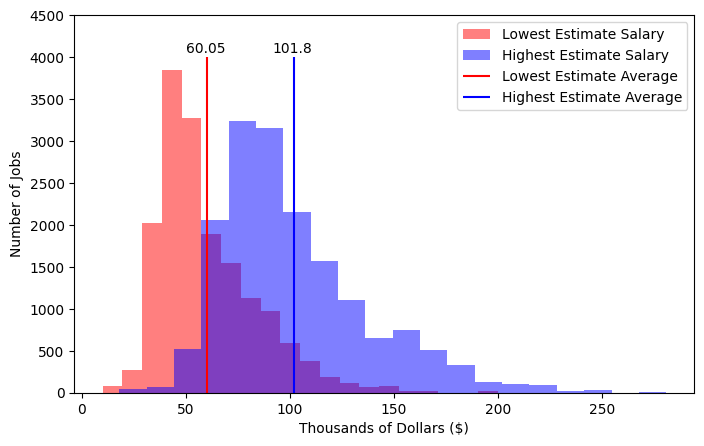

In [ ]:
lower_mean = analyst_jobs['Salary Lower Limit'].mean(axis=0)
upper_mean = analyst_jobs['Salary Upper Limit'].mean(axis=0)

plt.figure(figsize=(8,5),dpi = 100)
plt.ylim([0,4500])

plt.hist(analyst_jobs['Salary Lower Limit'], fc=(1, 0, 0, 0.5),label="Lowest Estimate Salary",bins=20)
plt.hist(analyst_jobs['Salary Upper Limit'],fc=(0, 0, 1, 0.5),label="Highest Estimate Salary",bins=20)

plt.vlines(lower_mean, ymin=0, ymax=4000, color='red', label='Lowest Estimate Average')
plt.vlines(upper_mean, ymin=0, ymax=4000, color='blue', label='Highest Estimate Average')
plt.annotate(round(lower_mean, 2),xy=(lower_mean-10, 4050))
plt.annotate(round(upper_mean, 2),xy=(upper_mean-10, 4050))
    
plt.xlabel('Thousands of Dollars ($)')
plt.ylabel('Number of Jobs')
plt.legend()
plt.show()

## Part 3.2 - Salary Estimates Based on Job Titles

*****Descriptive statistics*****


[Salaries of data analysts]
      Salary Lower Limit  Salary Upper Limit  Salary Average
min                 10.0                18.0            14.0
max                200.0               281.0           225.0
mean                63.0               105.0            84.0


[Salaries of business analysts]
      Salary Lower Limit  Salary Upper Limit  Salary Average
min                 10.0                18.0            14.0
max                138.0               226.0           178.0
mean                56.0                98.0            77.0


[Salaries of product analysts]
      Salary Lower Limit  Salary Upper Limit  Salary Average
min                 25.0                49.0            38.0
max                140.0               218.0           176.0
mean                52.0                93.0            73.0


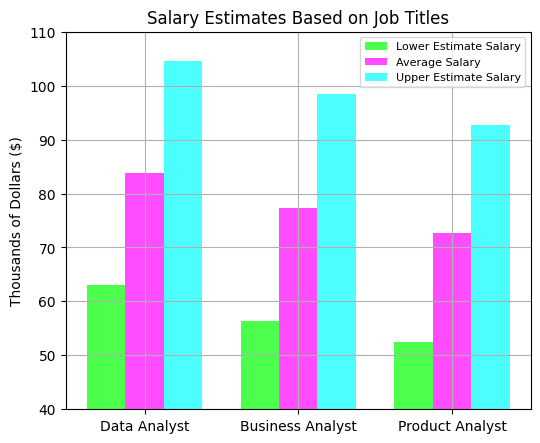

In [ ]:
# textual descriptive stats
data_analyst_dscb = analyst_jobs[analyst_jobs['Refined Job Titles']=='Data Analyst'].describe()
business_analyst_dscb = analyst_jobs[analyst_jobs['Refined Job Titles']=='Business Analyst'].describe()
product_analyst_dscb = analyst_jobs[analyst_jobs['Refined Job Titles']=='Product Analyst'].describe()

print('*****Descriptive statistics*****') 
print('\n')
print('[Salaries of data analysts]')
print(data_analyst_dscb.iloc[:,3:].round(0).loc[['min','max','mean'],:])

print('\n')
print('[Salaries of business analysts]')
print(business_analyst_dscb.iloc[:,3:].round(0).loc[['min','max','mean'],:])

print('\n')
print('[Salaries of product analysts]')
print(product_analyst_dscb.iloc[:,3:].round(0).loc[['min','max','mean'],:])

# plot

mean_data = [analyst_jobs.loc[analyst_jobs['Refined Job Titles'] == 'Data Analyst', 'Salary Average'].mean(),
             analyst_jobs.loc[analyst_jobs['Refined Job Titles'] == 'Business Analyst', 'Salary Average'].mean(),
             analyst_jobs.loc[analyst_jobs['Refined Job Titles'] == 'Product Analyst', 'Salary Average'].mean()]


lmean_data = [analyst_jobs.loc[analyst_jobs['Refined Job Titles'] == 'Data Analyst', 'Salary Lower Limit'].mean(),
             analyst_jobs.loc[analyst_jobs['Refined Job Titles'] == 'Business Analyst', 'Salary Lower Limit'].mean(),
             analyst_jobs.loc[analyst_jobs['Refined Job Titles'] == 'Product Analyst', 'Salary Lower Limit'].mean()]
          

umean_data = [analyst_jobs.loc[analyst_jobs['Refined Job Titles'] == 'Data Analyst', 'Salary Upper Limit'].mean(),
             analyst_jobs.loc[analyst_jobs['Refined Job Titles'] == 'Business Analyst', 'Salary Upper Limit'].mean(),
             analyst_jobs.loc[analyst_jobs['Refined Job Titles'] == 'Product Analyst', 'Salary Upper Limit'].mean()]

bar_titles = ['Data Analyst','Business Analyst','Product Analyst']

# print(mean_data)
# print(umean_data)
# print(lmean_data)


barWidth = 0.25
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.figure(figsize=(6,5),dpi = 100)
plt.title("Salary Estimates Based on Job Titles")
plt.ylim([40,110])
plt.bar(br1,lmean_data,label="Lower Estimate Salary",fc=(0, 1, 0, 0.7),width = barWidth)
plt.bar(br2,mean_data,label="Average Salary",fc=(1, 0, 1, 0.7),width = barWidth)
plt.bar(br3,umean_data,label="Upper Estimate Salary",fc=(0, 1, 1, 0.7),width = barWidth)


plt.ylabel('Thousands of Dollars ($)')
plt.xticks([r + barWidth for r in range(3)],bar_titles)
plt.legend(prop={'size': 8})
plt.grid(True)
plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


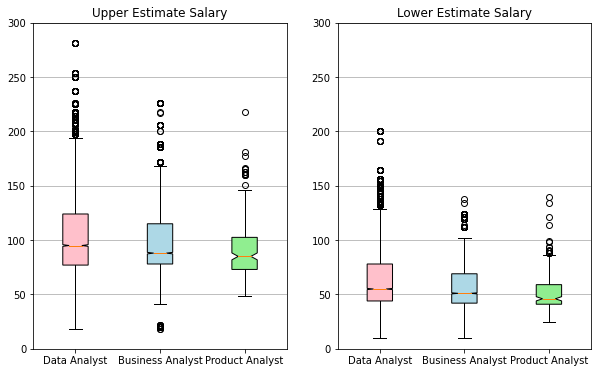

In [ ]:
# boxplots of salaries of three titles

salary_uplim_data = [analyst_jobs[analyst_jobs['Refined Job Titles']==i]['Salary Upper Limit'].values for i in job_categories.keys()]
salary_lowlim_data = [analyst_jobs[analyst_jobs['Refined Job Titles']==i]['Salary Lower Limit'].values for i in job_categories.keys()]

labels = ['Data Analyst', 'Business Analyst', 'Product Analyst']

plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
bplot1 = plt.boxplot(salary_uplim_data, vert=True, patch_artist=True, labels=labels, notch=True)
plt.title('Upper Estimate Salary')
plt.ylabel=('Thousands of Dollars ($)')
plt.yticks(np.linspace(0,300,7,endpoint=True))
plt.grid(axis='y')

plt.subplot(1,2,2)
bplot2 = plt.boxplot(salary_lowlim_data, vert=True, patch_artist=True, labels=labels, notch=True)
plt.title('Lower Estimate Salary')
plt.ylabel=('Thousands of Dollars ($)')
plt.yticks(np.linspace(0,300,7,endpoint=True))
plt.grid(axis='y')

colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1,bplot2):
    for patch, color in zip(bplot['boxes'],colors):
        patch.set_facecolor(color)

plt.show()

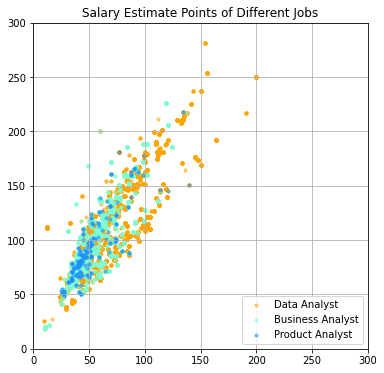

In [ ]:
# scatter of salary points of three titles
plt.figure(figsize=(6,6))

labels = ['Data Analyst', 'Business Analyst', 'Product Analyst']
color = ['orange','aquamarine','dodgerblue']
for l, c in zip(labels,color):
    plt.scatter(x=analyst_jobs[analyst_jobs['Refined Job Titles']==l]['Salary Lower Limit'], y=analyst_jobs[analyst_jobs['Refined Job Titles']==l]['Salary Upper Limit'], c=c, alpha=0.5, label=l, s=10)

plt.xticks(np.linspace(0,300,7, endpoint=True))
plt.yticks(np.linspace(0,300,7, endpoint=True))

plt.ylabel = ('Upper Estimate Salary')
plt.xlabel = ('Lower Estimate Salary')

plt.title('Salary Estimate Points of Different Jobs')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Part 3.3 - Types of Ownership

Here, we takea look at the different ownerships of organizations offering the jobs.

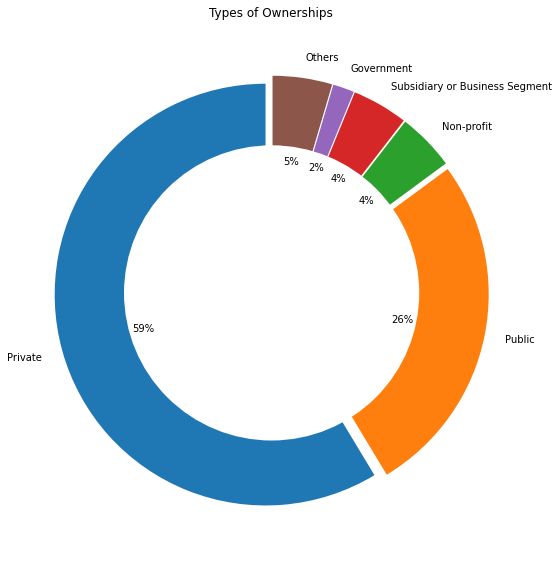

In [ ]:
owners = ['Private', 'Public', 'Non-profit', 'Subsidiary or Business Segment', 'Government', 'Others']
owners_freq = analyst_jobs['Type of ownership'].value_counts()[:6].tolist()

others_list = analyst_jobs['Type of ownership'].value_counts()[6:].tolist()
others = sum(others_list)
owners_freq.append(others)

owners_freq.pop(2)

explode = (0.03,0.03,0.03,0.03,0.03,0.03)
fig1, ax1 = plt.subplots(figsize=(8,8))
plt.title("Types of Ownerships")
ax1.pie(owners_freq,explode=explode, labels=owners, autopct='%1.0f%%', startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

We also take a look at the average salary offered by the different job sectors.

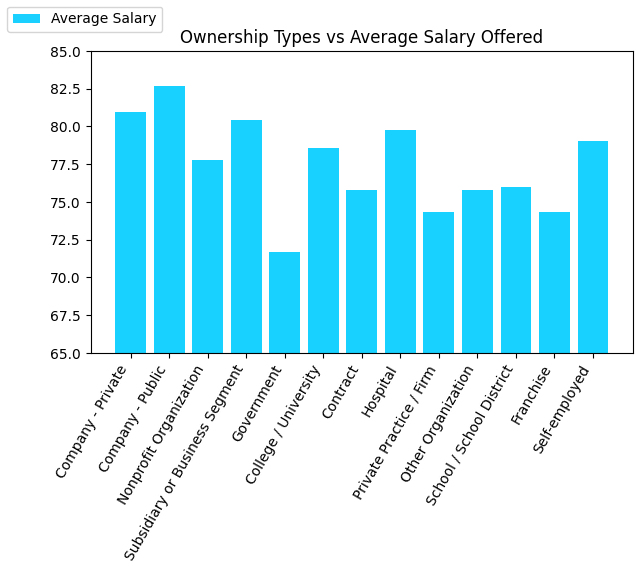

In [ ]:
# no_city = int(input("Enter Number of Cities:"))

owners = analyst_jobs['Type of ownership'].value_counts().index.tolist()
owners_freq = analyst_jobs['Type of ownership'].value_counts().tolist()

owners.pop(2)
owners_freq.pop(2)
owners.pop(6)
owners_freq.pop(6)

owners_sals = []

for own in owners:
      owners_sals.append(analyst_jobs.loc[analyst_jobs['Type of ownership'] == own, 'Salary Average'].mean())

fig, ax1 = plt.subplots(figsize=(7,4),dpi = 100)

plt.title("Ownership Types vs Average Salary Offered" )

plt.ylim([65,85])
plt.ylabel = ('Thousands of Dollars ($)')
plt.xlabel = ('Ownership Type')
plt.bar(owners,owners_sals,label="Average Salary",fc=(0, 0.8, 1, 0.9))
plt.xticks(rotation = 60,ha="right")
fig.legend(loc=2)
fig.show()

## Part 3.4 - Skills Requirement for Different Job Titles


Then, see how the skills requirements look like for all the jobs

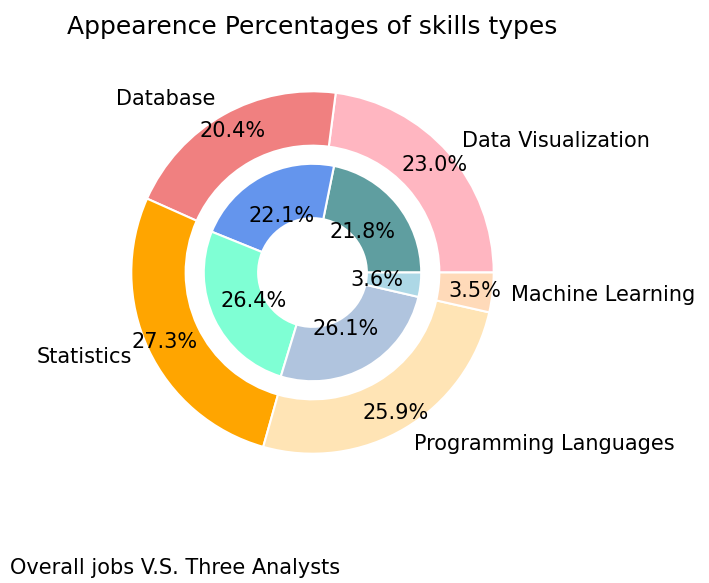

In [ ]:
skilltype = []
for i in jobs['refined skills']:
    if i != []:
        for j in i:
            skilltype.append(j)
#totc = len(skilltype)
dvc_total =skilltype.count('Data Visualization')
dc_total = skilltype.count('Database')
stac_total = skilltype.count('Statistics')
plc_total = skilltype.count('Programming Languages')
mlc_total = skilltype.count('Machine Learning')

counting1 = np.array([dvc_total,dc_total,stac_total,plc_total,mlc_total])
#label2 = np.array(['{:.1%}'.format(dvc_total/totc),'{:.1%}'.format(dc_total/totc),'{:.1%}'.format(stac_total/totc),'{:.1%}'.format(plc_total/totc),'{:.1%}'.format(mlc_total/totc)])
label1 = ['Data Visualization','Database','Statistics','Programming Languages','Machine Learning']
# mycolor = ['CadetBlue','CornflowerBlue','DarkSlateBlue','DarkSlateGrey','LightBlue']

# plt.pie(counting1,labels=label1,colors= mycolor,autopct='%1.1f%%',startangle=90)
# plt.title('Appearence Percentages of skills types in all jobs')

# plt.show()

skilltype = []
for i in analyst_jobs['refined skills']:
    if i != []:
        for j in i:
            skilltype.append(j)
#anac = len(skilltype)
dvc_ana =skilltype.count('Data Visualization')
dc_ana = skilltype.count('Database')
stac_ana = skilltype.count('Statistics')
plc_ana = skilltype.count('Programming Languages')
mlc_ana = skilltype.count('Machine Learning')

counting2 = np.array([dvc_ana,dc_ana,stac_ana,plc_ana,mlc_ana])
#label2 = np.array(['{:.1%}'.format(dvc_total/totc),'{:.1%}'.format(dc_total/totc),'{:.1%}'.format(stac_total/totc),'{:.1%}'.format(plc_total/totc),'{:.1%}'.format(mlc_total/totc)])
# label1 = ['Data Visualization','Database','Statistics','Programming Languages','Machine Learning']
# mycolor = ['CadetBlue','CornflowerBlue','DarkSlateBlue','DarkSlateGrey','LightBlue']

# plt.pie(counting2,labels=label1,colors= mycolor,autopct='%1.1f%%',startangle=90)
# plt.title('Appearence Percentages of skills types in three analysts jobs')

# plt.show()

size = 0.3
#cmap = plt.colormaps["tab20c"]
plt.figure(figsize=(4,4),dpi = 150)
outer_colors = ['LightPink', 'LightCoral', 'Orange', 'Moccasin', 'PeachPuff']
inner_colors = ['CadetBlue','CornflowerBlue','Aquamarine','LightSteelBlue','LightBlue']
plt.pie(counting1,radius=1,labels=label1, colors=outer_colors,autopct='%1.1f%%',pctdistance=0.9,wedgeprops=dict(width=size, edgecolor='w'))
plt.pie(counting2, radius=0.6, colors=inner_colors,autopct='%1.1f%%',wedgeprops=dict(width=size, edgecolor='w'))
plt.title('Appearence Percentages of skills types')
plt.annotate('Overall jobs V.S. Three Analysts',xy=(10, 10), xycoords='figure pixels')
plt.show()


Frequency of skills groupby different jobs:
                    Programming Languages  Statistics  Machine Learning  \
Refined Job Titles                                                        
Product Analyst                        97         122                16   
Business Analyst                     2530        2710               120   
Data Analyst                         6889        6800              1180   

                    Data Visualization  Database  
Refined Job Titles                                
Product Analyst                     97        81  
Business Analyst                  2682      2195  
Data Analyst                      5181      5765  


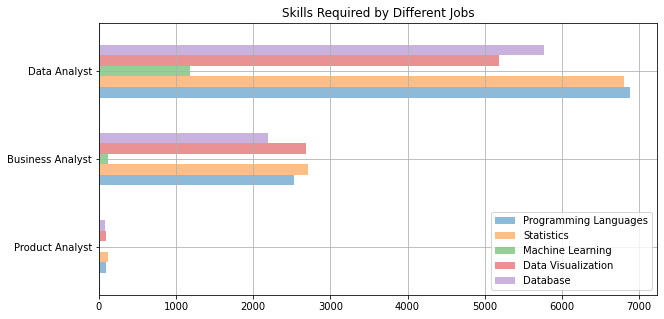

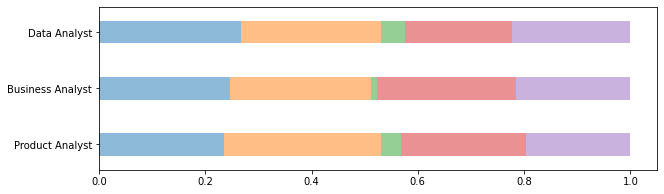

In [ ]:
# skills required by three jobs
analyst_jobs2 = analyst_jobs

# calculate the frequency
for i in skill_types.keys():
  analyst_jobs2[i] = analyst_jobs2['refined skills'].apply(lambda x: i in x)

skills_df = analyst_jobs2.iloc[:,22:27].groupby(analyst_jobs2['Refined Job Titles']).sum().sort_values(by='Programming Languages')

print('Frequency of skills groupby different jobs:')
print(skills_df)
# barh of counts
skill_barhplot1 = skills_df.plot.barh(figsize=(10,5), alpha=0.5, width=0.6, grid=True, xlabel='', ylabel= '# of cases', title='Skills Required by Different Jobs')
# barh of percent
skill_barhplot2 = skills_df.apply(lambda x: x/x.sum(),axis='columns').plot.barh(figsize=(10,3), stacked=True, alpha=0.5, width=0.4, legend=False, xlabel='', ylabel='%')



## Part 3.5 - Programming languages for Different Job Titles



Now, lets look at the programming language.

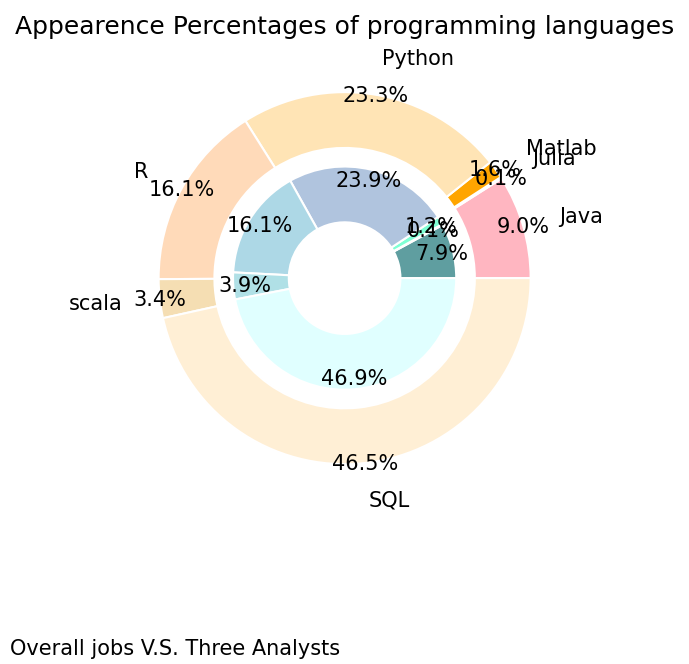

In [39]:
pl = []
for i in jobs['programming languages']:
    if i != []:
        for j in i:
            pl.append(j)
java_total =pl.count('Java')
julia_total = pl.count('Julia')
mat_total = pl.count('Matlab')
python_total = pl.count('Python')
r_total = pl.count('R')
scala_total = pl.count('scala')
sql_total = pl.count('SQL')
counting3 = np.array([java_total,julia_total,mat_total,python_total,r_total,scala_total,sql_total])
label1 = ['Java','Julia','Matlab','Python','R','scala','SQL']

pl = []
for i in analyst_jobs['programming languages']:
    if i != []:
        for j in i:
            pl.append(j)
java_ana =pl.count('Java')
julia_ana = pl.count('Julia')
mat_ana = pl.count('Matlab')
python_ana = pl.count('Python')
r_ana = pl.count('R')
scala_ana = pl.count('scala')
sql_ana = pl.count('SQL')
counting4 = np.array([java_ana,julia_ana,mat_ana,python_ana,r_ana,scala_ana,sql_ana])

size = 0.3
plt.figure(figsize=(4,5),dpi = 150)
outer_colors = ['LightPink', 'LightCoral', 'Orange', 'Moccasin', 'PeachPuff','Wheat','PapayaWhip']
inner_colors = ['CadetBlue','CornflowerBlue','Aquamarine','LightSteelBlue','LightBlue','PowderBlue','LightCyan']
plt.pie(counting3,radius=1,labels=label1, colors=outer_colors,autopct='%1.1f%%',pctdistance=1,labeldistance=1.2,wedgeprops=dict(width=size, edgecolor='w'))
plt.pie(counting4, radius=0.6, colors=inner_colors,autopct='%1.1f%%',pctdistance=0.9,wedgeprops=dict(width=size, edgecolor='w'))
plt.title('Appearence Percentages of programming languages')
#plt.legend(loc = 4)
plt.annotate('Overall jobs V.S. Three Analysts',xy=(10, 10), xycoords='figure pixels')
plt.show()
print(' ')

Frequency of programming languages groupby different jobs:
                    Python     R   SQL  Java  Julia  scala
Refined Job Titles                                        
Product Analyst         26    36    81     3      0      0
Business Analyst       383   423  2195   210      0     15
Data Analyst          3681  2295  5765  1142     22    651


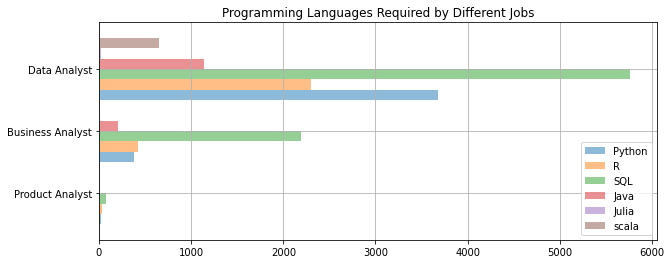

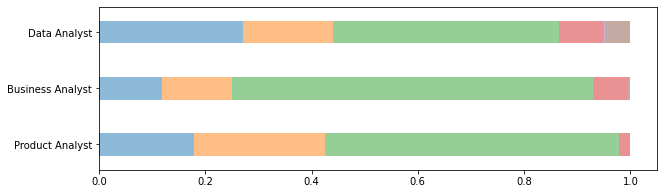

In [ ]:
# programming languages required by three jobs

# calculate the frequency
for j in programming_languages.keys():
  analyst_jobs2[j] = analyst_jobs2['programming languages'].apply(lambda x: j in x)

languages_df = analyst_jobs2.iloc[:,27:33].groupby(analyst_jobs2['Refined Job Titles']).sum().sort_values(by='Python')

print('Frequency of programming languages groupby different jobs:')
print(languages_df)
# barh of counts
lang_barhplot1 = languages_df.plot.barh(figsize=(10,4), alpha=0.5, width=1.0, grid=True, xlabel='', ylabel= '# of cases', title='Programming Languages Required by Different Jobs')
# barh of percent
lang_barhplot2 = languages_df.apply(lambda x: x/x.sum(),axis='columns').plot.barh(figsize=(10,3), stacked=True, alpha=0.5, width=0.4, legend=False, xlabel='', ylabel='%')



## Part 3.6 - Location Importance

In this section, we visualize the importance of location by comparing the top 30 common headquarter locations with average salaries

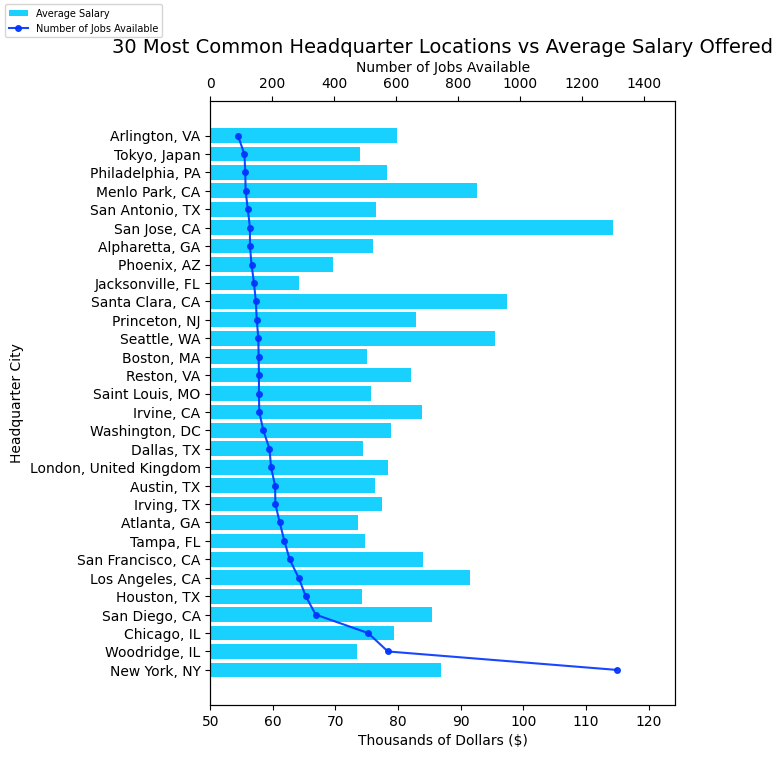

In [49]:
no_city = 30

# no_city = int(input("Enter Number of Cities:"))

most_freq_loc = analyst_jobs['Headquarters'].value_counts()[:no_city+1].index.tolist()
loc_freq = analyst_jobs['Headquarters'].value_counts()[:no_city+1].tolist()

most_freq_loc.pop(1)
loc_freq.pop(1)

loc_avg_sals = []

for city in most_freq_loc:
      loc_avg_sals.append(analyst_jobs.loc[analyst_jobs['Headquarters'] == city, 'Salary Average'].mean())

fig, ax1 = plt.subplots(figsize=(6,8),dpi = 100)

plt.title(str(no_city)+" Most Common Headquarter Locations vs Average Salary Offered" ,fontdict={'fontsize': 14})

ax1.set_xlim([50,max(loc_avg_sals)+10])
ax1.set_xlabel('Thousands of Dollars ($)')
ax1.set_ylabel('Headquarter City')
ax1.barh(most_freq_loc,loc_avg_sals,label="Average Salary",fc=(0, 0.8, 1, 0.9))

ax2 = plt.twiny()
ax2.set_xlim([0,1500])
ax2.set_xlabel("Number of Jobs Available")
ax2.plot(loc_freq,most_freq_loc,'-o',markersize=4,label="Number of Jobs Available",color=(0, 0.2, 1, 0.9))

fig.legend(prop={'size': 7}, loc = 'upper left')
fig.show()